In [2]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
%matplotlib inline

### <center>数据集类</center>

In [4]:
class MnistDataset(Dataset):

    def __init__(self, csv_file):
        self.data_df = pd.read_csv(csv_file, header=None)
        pass

    def __len__(self):
        return len(self.data_df)

    def __getitem__(self, index):
        # 目标图像（标签），独热编码
        label = self.data_df.iloc[index, 0]
        target = torch.zeros((10))
        target[label] = 1.0

        # 图像数据，取值范围是0~255，标准化为0~1
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0

        # 返回标签、图像数据张量以及目标张量
        return label, image_values, target

    def plot_image(self, index):
        arr = self.data_df.iloc[index,1:].values.reshape(28, 28)
        plt.title("label = " + str(self.data_df.iloc[index, 0]))
        plt.imshow(arr, interpolation='none', cmap='Blues')
    pass

### <center>加载数据集</center>

In [ ]:
mnist_dataset = MnistDataset('../data/mnist_train.csv')

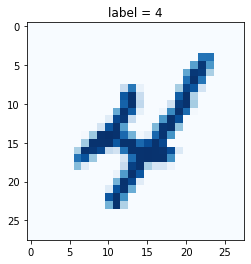

In [26]:
mnist_dataset.plot_image(9)

In [ ]:
mnist_dataset[100]

### <center>神经网络类</center>

In [3]:
class Classifier(nn.Module):
    def __init__(self):
        # 初始化pytorch父类
        super().__init__()

        # 定义神经网络层
        self.model = nn.Sequential(
            nn.Linear(784, 200), # 从784个节点到200个节点的全连接映射
            nn.Sigmoid(),
            nn.Linear(200, 10), #将200个节点映射到10个节点的全连接映射
            nn.Sigmoid()
        )

        # 创建损失函数
        self.loss_function = nn.MSELoss()

        # 创建优化器，使用简单的梯度下降
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # 记录训练进展的计数器和列表
        self.counter = 0
        self.progress = []

        pass
    
    def forward(self, inputs):
        # 直接运行模型
        return self.model(inputs)
    
    def train(self, inputs, targets):
        # 计算网络的输出值
        outputs = self.forward(inputs)
        # 计算损失值
        loss = self.loss_function(outputs, targets)

        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass
        # 梯度归零
        self.optimiser.zero_grad()
        # 反向传播
        loss.backward()
        # 更新权重
        self.optimiser.step()

        pass
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    pass


### <center>训练神经网络</center>

In [17]:
%%time

# 创建神经网络
C = Classifier()

epochs = 4

for i in range(epochs):
    print("trainning epoch", i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor, target_tensor)
        pass
    pass

trainning epoch 1 of 4
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
trainning epoch 2 of 4
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
trainning epoch 3 of 4
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
trainning epoch 4 of 4
counter =  190000
counter =  200000
counter =  210000
counter =  220000
counter =  230000
counter =  240000


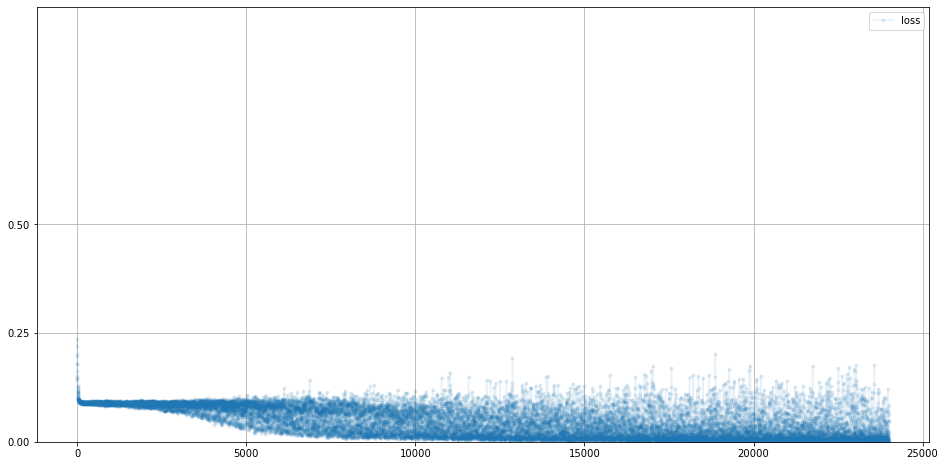

In [18]:
# 绘制分类器损失值
C.plot_progress()

### <center>在测试集上检验分类模型</center>

In [19]:
# 加载MNIST测试数据
mnist_test_dataset = MnistDataset('../data/mnist_test.csv')

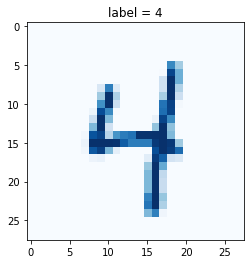

In [20]:
# 挑选一幅图像
record = 19

# 绘制图像和标签
mnist_test_dataset.plot_image(record)

<AxesSubplot:>

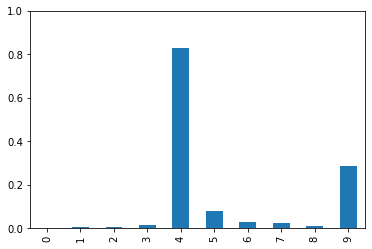

In [21]:
image_data = mnist_test_dataset[record][1]

# 调用训练后的神经网络
output = C.forward(image_data)
# 绘制输出张量
pd.DataFrame(output.detach().numpy()).plot(kind='bar'
             , legend=False, ylim=(0,1))

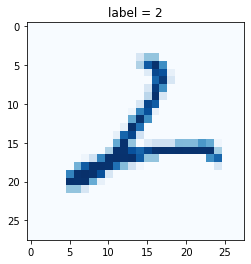

In [22]:
# 挑选一幅图像
record = 43

# 绘制图像和标签
mnist_test_dataset.plot_image(record)

<AxesSubplot:>

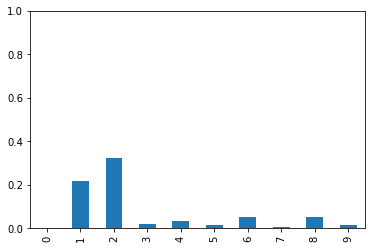

In [23]:
image_data = mnist_test_dataset[record][1]

# 调用训练后的神经网络
output = C.forward(image_data)
# 绘制输出张量
pd.DataFrame(output.detach().numpy()).plot(kind='bar'
             , legend=False, ylim=(0,1))

### <center>分类准确率</center>

In [24]:
score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = C.forward(image_data_tensor).detach().numpy()
    if answer.argmax() == label:
        score += 1
        pass
    items += 1
    pass
print(score, items, score/items)

8816 10000 0.8816
